In [62]:
#pip install scikit-learn

In [63]:
from sklearn.model_selection import train_test_split

#from imutils import pathsl*
import numpy as np
import os
import pickle
from keras.layers import LSTM,Dense
from keras.models import Sequential
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [64]:
stock_data=pd.read_csv(r'C:\Users\Karthick\Music\New folder\DATABASE\stock_data.csv')

In [65]:
stock_data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
5,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
6,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
7,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
8,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
9,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Figure(1080x720)


C:\Users\Karthick\AppData\Local\Temp\ipykernel_11572\3170076097.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date)


[Text(-200.0, 0, '08-10-2018'),
 Text(0.0, 0, '05-10-2018'),
 Text(200.0, 0, '04-10-2018'),
 Text(400.0, 0, '03-10-2018'),
 Text(600.0, 0, '01-10-2018'),
 Text(800.0, 0, '28-09-2018'),
 Text(1000.0, 0, '27-09-2018'),
 Text(1200.0, 0, '26-09-2018'),
 Text(1400.0, 0, '25-09-2018')]

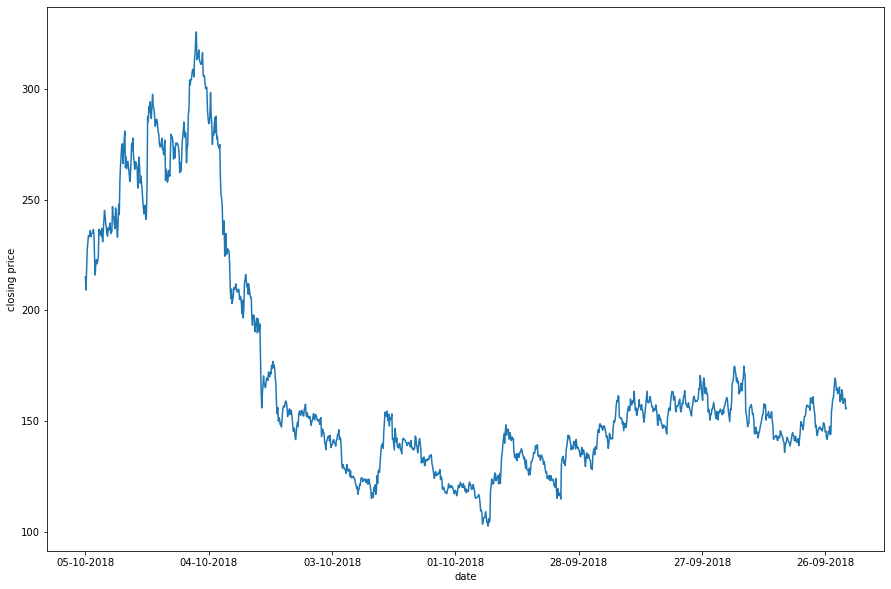

In [66]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)
close=stock_data['Close']
date=stock_data['Date']
plt.plot(close)
plt.xlabel('for true data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)

In [67]:
x=stock_data.drop(['Close','Date'],axis=1).values
y=stock_data['Close'].values

In [68]:
print(x.shape,y.shape)

(1235, 6) (1235,)


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=False)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=scaler.fit_transform(Y_train.reshape(-1,1))
y_test=scaler.transform(Y_test.reshape(-1,1))

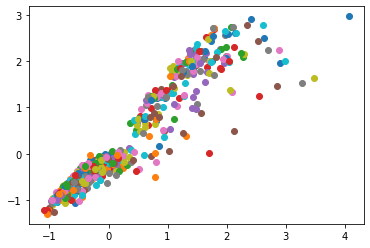

In [70]:
for i in range(x_train.shape[0]):
    plt.scatter(np.mean(x_train[i]),y_train[i].ravel())

In [71]:
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
y_final=[]
print(mean_squared_error(y_pred,y_test))
y_true=list(scaler.inverse_transform(y_pred).ravel())
for y in y_true:
    y_final.append(round(y,2))
Date=[]
for y in y_final:
    Date.append(stock_data['Date'].values[y_final.index(y)])
#(date)
#print(y_train)

6.122124040472232e-05


In [72]:
# import pickle
# pickle.dump(model,open(r"C:\Users\Karthick\Music\FRONT END\linear.sav",'wb'))

In [73]:
reg=linear.fit(x_train,y_train)
print(reg.coef_)

[[-7.12312454e-02  1.07570685e-01  7.61512584e-02  8.88351867e-01
   2.97299128e-04 -1.60012397e-03]]


Figure(1080x720)
[153.27, 223.03, 153.02, 133.19, 317.22, 122.49, 161.7, 127.72, 141.16, 163.44]
[153.45 222.95 152.95 132.6  317.6  122.4  160.35 128.   141.2  162.2 ]


C:\Users\Karthick\AppData\Local\Temp\ipykernel_11572\1418943607.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date)


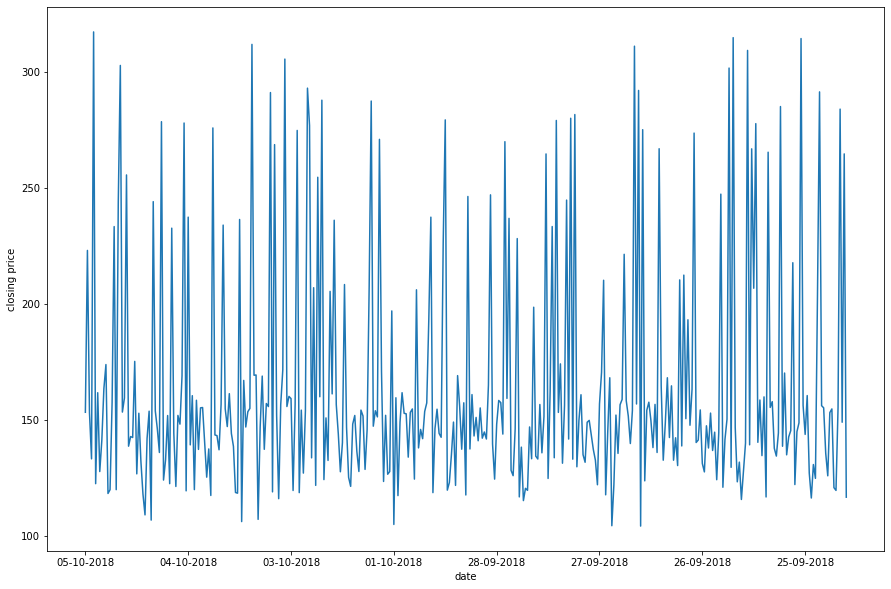

In [74]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)
close=y_final
date=Date[:-1]
plt.plot(y_final)
plt.xlabel('for predicted data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)
print(y_final[:10])
print(Y_test[:10])




Figure(1080x720)


C:\Users\Karthick\AppData\Local\Temp\ipykernel_11572\90254371.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date)


[Text(-50.0, 0, '08-10-2018'),
 Text(0.0, 0, '05-10-2018'),
 Text(50.0, 0, '04-10-2018'),
 Text(100.0, 0, '03-10-2018'),
 Text(150.0, 0, '01-10-2018'),
 Text(200.0, 0, '28-09-2018'),
 Text(250.0, 0, '27-09-2018'),
 Text(300.0, 0, '26-09-2018'),
 Text(350.0, 0, '25-09-2018'),
 Text(400.0, 0, '24-09-2018')]

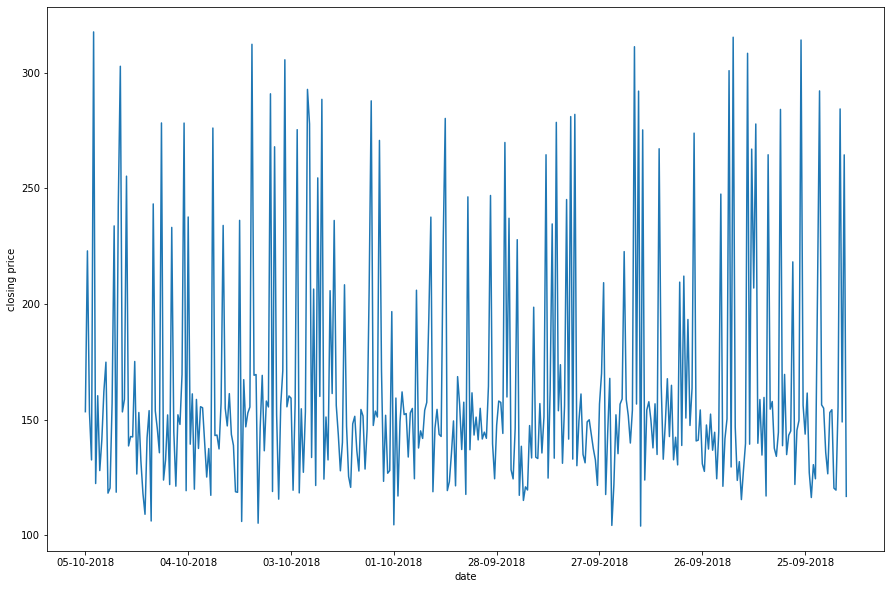

In [75]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)
close=y_final
date=Date[:-1]
plt.plot(Y_test)
plt.xlabel('for test data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)

In [76]:
sup=SVR()
sup.fit(x_train,y_train.ravel())

SVR()

In [77]:
y_pred=sup.predict(x_test)

In [78]:
y_final=[]
print(mean_squared_error(y_pred,y_test))


0.007508198268544981


# Use of LSTM


In [79]:
y=stock_data['Close'].values

In [80]:
print(y.shape)
print(y[:10])

(1235,)
[215.15 209.2  218.2  227.6  230.9  233.75 233.25 234.25 236.1  233.3 ]


In [81]:
def split_sequence1(sequence,t_steps,n_features):
    X=[]
    Y=[]
    for i in range(0,len(sequence),t_steps+n_features):
        # find the end of this pattern
        end_ix = i + t_steps
        #print(end_ix,end_ix+(n_features))
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+(n_features)]
        X.append(seq_x)
        Y.append(seq_y)
    X=np.array(X)
    Y=np.array(Y)
    #print(X.shape,Y.shape)
    return X,Y

In [82]:
def split_sequence(sequence,t_steps,n_prediction):
    X=[]
    Y=[]
    for i in range(0,len(sequence),(t_steps+n_prediction)):
        # find the end of this pattern
        end_ix = i + t_steps
        #print(end_ix,end_ix+(n_features))
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+n_prediction]
        X.append(seq_x)
        Y.append(seq_y)
    X=np.array(X)
    Y=np.array(Y)
    #print(X.shape,Y.shape)
    return X,Y

In [83]:
n_prediction=9
t_steps=10
X_seq,Y_seq=split_sequence(y,t_steps,n_prediction)
print(X_seq.shape,Y_seq.shape)
#print(Y_seq)

(65, 10) (65, 9)


In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X_seq,Y_seq,test_size=0.3,random_state=False)
x_test1=X_test
print(X_train.shape,Y_train.shape)

(45, 10) (45, 9)


In [85]:
model = Sequential()
model.add(LSTM(50, activation='relu'))
model.add(Dense(9))
model.compile(optimizer='adam', loss='mse')
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)#samples,time-steps,features
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)
#Y_train= Y_train.reshape(Y_train.shape[0],Y_train.shape[1],1)
model.fit(X_train,Y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 9ms/step - loss: 32716.6992
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 32617.2500
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 26691.5469
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 25843.1172
Epoch 5/200
2/2 [==============================] - 0s 13ms/step - loss: 24258.6523
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 23937.3770
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 21795.1816
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 20780.2422
Epoch 9/200
2/2 [==============================] - 0s 17ms/step - loss: 19813.8242
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 18627.4609
Epoch 11/200
2/2 [==============================] - 0s 11ms/step - loss: 17291.1367
Epoch 12/200
2/2 [==============================] - 0s 10ms/step - loss: 15638.5303
Epoch 

2/2 [==============================] - 0s 7ms/step - loss: 44.6705
Epoch 102/200
2/2 [==============================] - 0s 8ms/step - loss: 42.9444
Epoch 103/200
2/2 [==============================] - 0s 11ms/step - loss: 43.7437
Epoch 104/200
2/2 [==============================] - 0s 13ms/step - loss: 42.6823
Epoch 105/200
2/2 [==============================] - 0s 9ms/step - loss: 42.5929
Epoch 106/200
2/2 [==============================] - 0s 7ms/step - loss: 43.4747
Epoch 107/200
2/2 [==============================] - 0s 11ms/step - loss: 43.4488
Epoch 108/200
2/2 [==============================] - 0s 12ms/step - loss: 43.7591
Epoch 109/200
2/2 [==============================] - 0s 16ms/step - loss: 42.3478
Epoch 110/200
2/2 [==============================] - 0s 8ms/step - loss: 43.6343
Epoch 111/200
2/2 [==============================] - 0s 9ms/step - loss: 42.2969
Epoch 112/200
2/2 [==============================] - 0s 8ms/step - loss: 44.6922
Epoch 113/200
2/2 [==================

In [86]:
# import pickle
# pickle.dump(model,open(r"C:\Users\Karthick\Music\FRONT END\lstm.pkl",'wb'))

In [87]:
y_pred=model.predict(X_test)
print(x_test1.flatten()[:12])
print(y_pred[0])

1/1 [==============================] - 0s 248ms/step
[142.15 147.25 150.2  149.65 150.2  153.25 157.55 159.3  158.95 161.5
 129.95 132.6 ]
[162.20918 155.1913  158.85042 156.63098 156.84013 157.23329 154.94882
 154.56093 158.84758]


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Print or use the metrics as needed
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 115.02210758862907
Mean Absolute Error (MAE): 7.427642940945096


In [89]:
Y_test[0]

array([161.2 , 152.05, 151.6 , 151.1 , 151.45, 151.1 , 148.8 , 149.75,
       145.75])

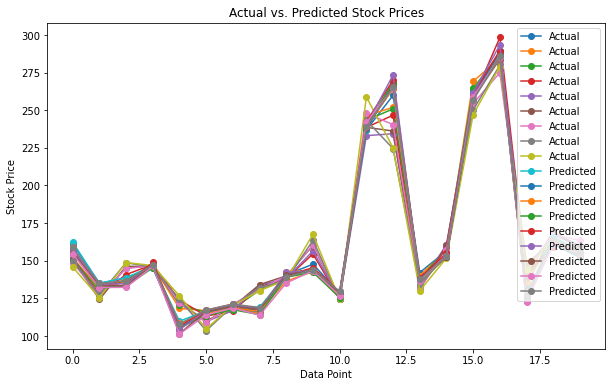

In [90]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred contains the predicted values
# Replace these with your actual variable names

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='o')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Data Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# stock analysis for different companies

In [91]:
company_A=pd.read_excel(r'C:\Users\Karthick\Music\New folder\DATABASE\STOCK_DATA_COMPANY_A4.xlsx')
company_B=pd.read_excel(r'C:\Users\Karthick\Music\New folder\DATABASE\STOCK_DATA_COMPANY_B4.xlsx')
company_C=pd.read_excel(r'C:\Users\Karthick\Music\New folder\DATABASE\STOCK_DATA_COMPANY_C4.xlsx')

In [92]:
X={}
X["Company_A"]=company_A['Close'].values
X["Company_B"]=company_B['Close'].values
X["Company_C"]=company_C['Close'].values

In [93]:
n_prediction=8
t_steps=10
x={}
y={}
for i in range(65,68):
    x["company_"+chr(i)],y["company_"+chr(i)]=split_sequence(X["Company_"+chr(i)],t_steps,n_prediction)
    #x_B,y_B=split_sequence(X_B,t_steps,n_prediction)
    #x_C,y_C=split_sequence(X_C,t_steps,n_prediction)
print(x["company_A"].shape)
#print(y_A)

(68, 10)


In [94]:
X_train={}
X_test={}
Y_train={}
Y_test={}
for keys in x:
    X_train[keys],X_test[keys],Y_train[keys],Y_test[keys]=train_test_split(x[keys],y[keys],test_size=0.3,random_state=False)
print(X_train['company_A'].shape,Y_train['company_A'].shape)

(47, 10) (47, 8)


In [95]:
model = Sequential()
model.add(LSTM(50, activation='relu'))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(8))
model.compile(optimizer='adam', loss='mse')
Y_pred={}
for keys in x:
    X_train[keys]=X_train[keys].reshape(X_train[keys].shape[0], X_train[keys].shape[1],1)#samples,time-steps,features
    X_test[keys]=X_test[keys].reshape(X_test[keys].shape[0], X_test[keys].shape[1],1)
    model.fit(X_train[keys],Y_train[keys],epochs=200, verbose=0)
    Y_pred[keys]=model.predict(X_test[keys])
#Y_train= Y_train.reshape(Y_train.shape[0],Y_train.shape[1],1)
#model.fit(X_train,Y_train,epochs=200, verbose=0)

1/1 [==============================] - 0s 36ms/step


In [96]:
date=company_A['Date'].values

company_A
[108.89114598 137.23569549 306.08774832 237.46658692 162.8588428
 246.55380032 122.69237744 291.3188508  277.02052846 142.84268934]
[247.02821 166.003   206.21883 195.31454 183.24747 209.91728 170.55629
 234.46786]
company_B
[125.52126185 245.19707294 253.62509184 204.75292992 222.37715394
 162.24654717 299.52845535 166.18585288 143.94362799 284.3077903 ]
[216.336   196.16536 207.24991 195.68872 190.69583 190.33473 214.97064
 202.85394]
company_C
[123.21772962 205.34808944 103.00267065 187.11147326 146.79859112
 272.20327517 137.76612512 196.52599072 199.12858321 310.85834464]
[262.63745 289.16425 176.55977 272.93222 268.68628 284.82632 217.71979
 222.18184]


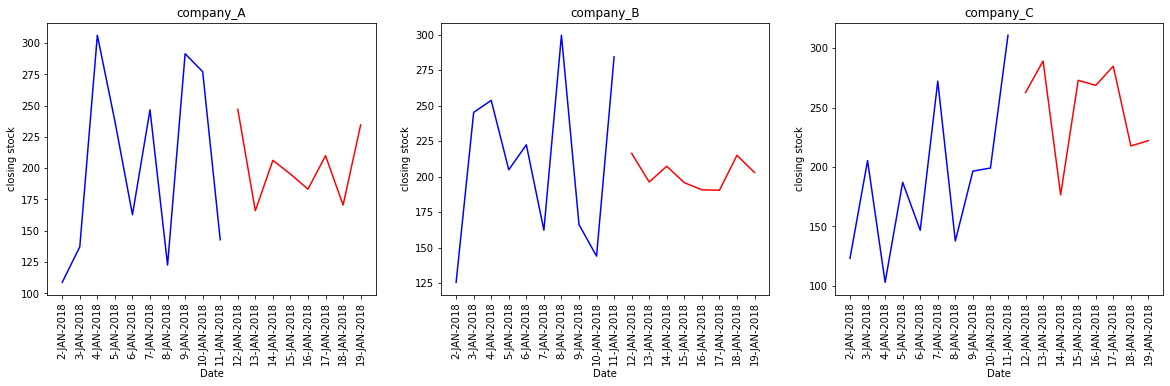

In [97]:
cell=1
Date=date[:18]
plt.figure(figsize=(20,5))
for keys in Y_pred:
    print(keys)
    print(X_test[keys].flatten()[:10])
    print(Y_pred[keys][0])
    plt.subplot(1,3,cell)
    plt.plot(Date[:10],X_test[keys].flatten()[:10],color='blue')
    plt.plot(Date[10:],Y_pred[keys][0],color='red')
    plt.xlabel('Date')
    plt.xticks(Date,rotation=90)
    plt.ylabel('closing stock')
    plt.title(keys)
    cell+=1
plt.show()  

In [98]:
X_A=company_A.drop(['Date','Close','Total Trade Quantity','Turnover (Lacs)'],axis=1)
Y_A=company_A['Close']

X_B=company_B.drop(['Date','Close','Total Trade Quantity','Turnover (Lacs)'],axis=1)
Y_B=company_B['Close']

X_C=company_C.drop(['Date','Close','Total Trade Quantity','Turnover (Lacs)'],axis=1)
Y_C=company_C['Close']


In [99]:
x_train_A,x_test_A,y_train_A,y_test_A=train_test_split(X_A,Y_A,test_size=0.3,random_state=False)

In [100]:
model1=SVR(kernel='linear')
model1.fit(x_train_A,y_train_A)

SVR(kernel='linear')

In [101]:
import pickle
pickle.dump(model1,open(r"C:\Users\Karthick\Music\FRONT END\svr.pkl",'wb'))

In [102]:
y_pred1=model1.predict(x_test_A)
loss1=mean_squared_error(y_pred1,y_test_A)

In [103]:
np.random.seed(0)
class LogisticRegression:
    def __init__(self):
            self.w=np.random.randn(x_train_A.shape[1])/(x_train_A.shape[1]**0.5)
            self.b=0
            self.v_w=0
            self.m_w=0
            self.v_b=0
            self.m_b=0
    def sigmoid(self,x):
         return(1/(1+np.exp(-x)))
    def loss(self,y,fx):
        return ((fx-y)**2)
    def grad_w(self,x,fx,y):
        return (fx-y)*fx*(1-fx)*x
    def grad_b(self,fx,y):
        return (fx-y)*fx*(1-fx)
    def fit(self,X,Y,eta,optimizer):
        beta_1=0.9
        beta_2=0.99
        
        for t in range(500):
            dw=0
            db=0
            self.Loss=0
            self.Y_pred=[]
            self.Y_true=[]
            epsilon=1e-10
            num=0
            for x,y in zip(X.values,Y.values):
               # print(x)
                self.a=np.dot(x,self.w)+self.b
                fx=self.sigmoid(self.a)
                self.Loss=self.Loss+self.loss(y,fx)
                dw=self.grad_w(x,fx,y)/X.shape[0]
                db=self.grad_b(fx,y)/X.shape[0]
                num+=1
                if(optimizer=='grad'):
                    self.w=self.w-eta*self.grad_w(x,fx,y)
                    self.b=self.b-eta*self.grad_b(fx,y)
                elif(optimizer=='adam'):
                    self.m_w = beta_1 * self.m_w + (1 - beta_1) *dw
                    self.m_b=beta_1*self.m_b + (1 - beta_1) *db
                    self.v_w= beta_2 * self.v_w + (1 - beta_2) * np.power(dw, 2)
                    self.v_b= beta_2 * self.v_b + (1 - beta_2) * np.power(db, 2)
                    
                    self.m_w_hat = self.m_w / (1 - np.power(beta_1, num))
                    self.v_w_hat = self.v_w/ (1 - np.power(beta_2, num))
                    
                    self.m_b_hat = self.m_b / (1 - np.power(beta_1, num))
                    self.v_b_hat = self.v_b/ (1 - np.power(beta_2, num))
                    
                    self.w= self.w - (eta * self.m_w_hat) / (np.sqrt(self.v_w_hat) + epsilon)
                    self.b= self.b - (eta * self.m_b_hat )/ (np.sqrt(self.v_b_hat) + epsilon)
        print("Epochs {}-----------loss {}".format(t,self.Loss))
    def predict(self,x_test):
            self.a=np.dot(x_test,self.w)+self.b
            fx=self.sigmoid(self.a)
            return(fx)
                

#model.fit(x_train,y_train,eta=0.00028,optimizer='adam')


In [104]:
model4=LogisticRegression()
model4.fit(x_train_A,y_train_A,eta=0.0028,optimizer='adam')

Epochs 499-----------loss 42461045.8055546


In [105]:
import pickle
pickle.dump(model4,open(r"C:\Users\Karthick\Music\FRONT END\lr.pkl",'wb'))

In [106]:
y_pred4=model4.predict(x_test_A)
loss4=mean_squared_error(y_pred4,y_test_A)
print(loss4)

48496.4725896776


Text(0, 0.5, '')

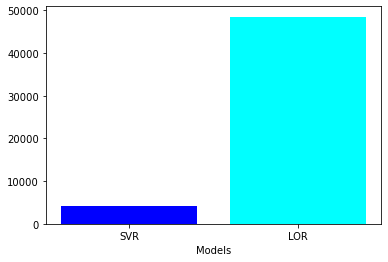

In [107]:
plt.bar(['SVR','LOR'],[loss1,loss4],color=['blue','cyan'])
plt.xlabel('Models')
plt.ylabel('')

Text(0.5, 1.0, 'company_A')

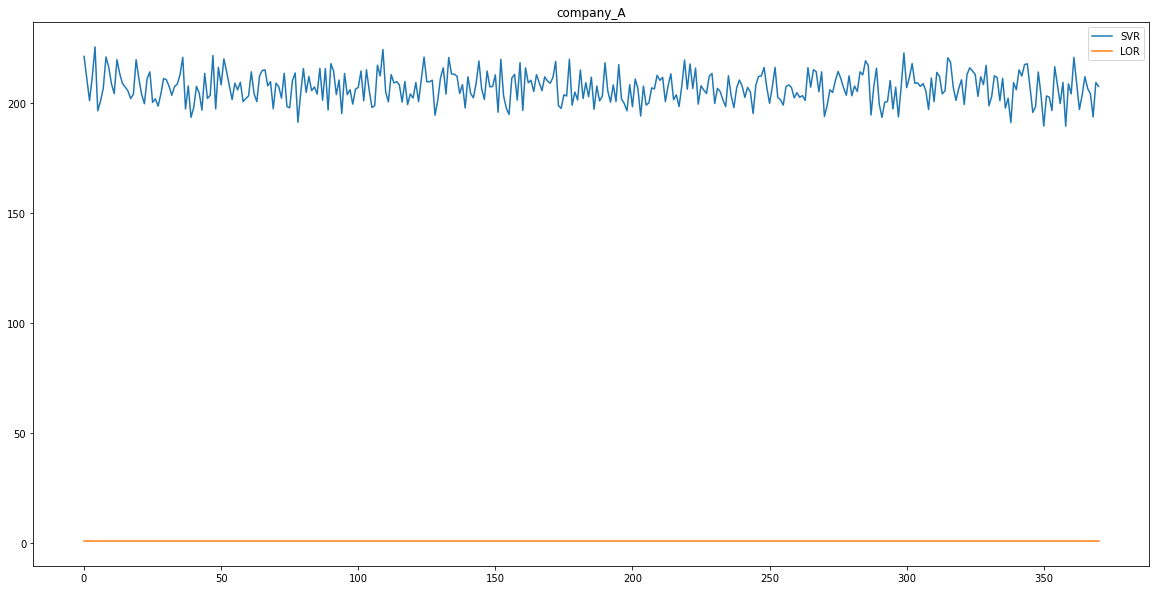

In [108]:
plt.figure(figsize=(20,10))
plt.plot(y_pred1)
plt.plot(y_pred4)
plt.legend(['SVR','LOR'])
plt.title('company_A')

In [109]:
x_train_B,x_test_B,y_train_B,y_test_B=train_test_split(X_B,Y_B,test_size=0.3,random_state=False)

In [110]:
model1=SVR(kernel='linear')
model1.fit(x_train_B,y_train_B)

SVR(kernel='linear')

In [111]:
y_pred1=model1.predict(x_test_B)
loss1=mean_squared_error(y_pred1,y_test_B)

In [112]:
model4=LogisticRegression()
model4.fit(x_train_B,y_train_B,eta=0.01,optimizer='adam')

Epochs 499-----------loss 43077015.82471381


In [113]:
y_pred4=model4.predict(x_test_B)
loss4=mean_squared_error(y_pred4,y_test_B)

Text(0, 0.5, 'loss')

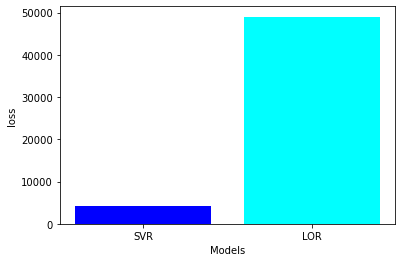

In [114]:
plt.bar(['SVR','LOR'],[loss1,loss4],color=['blue','cyan'])
plt.xlabel('Models')
plt.ylabel('loss')

Text(0.5, 1.0, 'company_B')

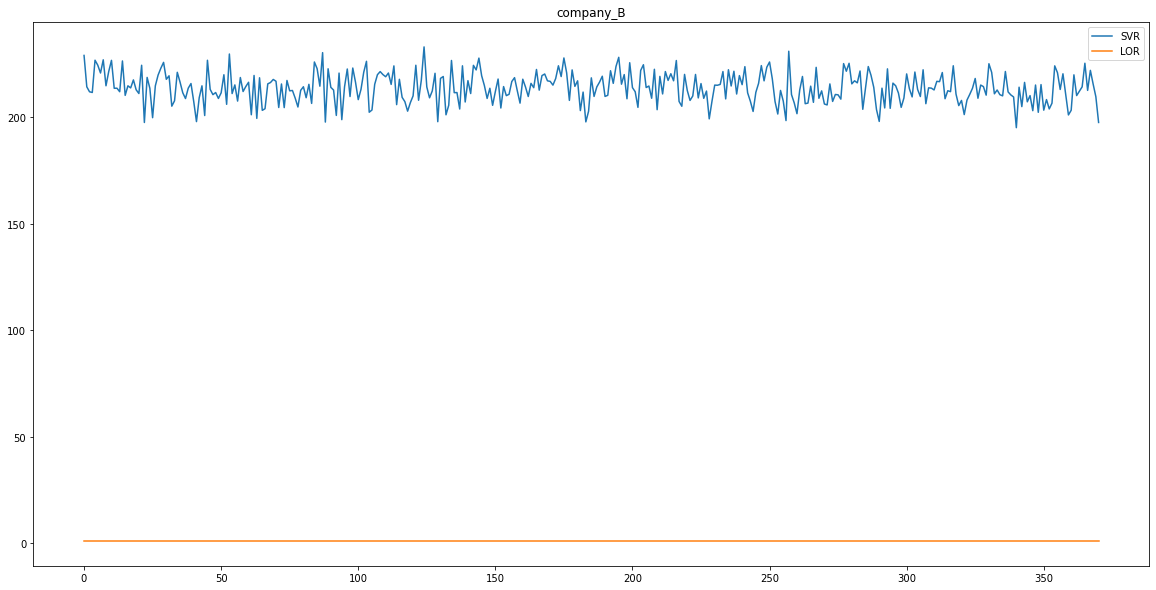

In [115]:
plt.figure(figsize=(20,10))
plt.plot(y_pred1)
plt.plot(y_pred4)
plt.legend(['SVR','LOR'])
plt.title('company_B')

In [116]:
x_train_C,x_test_C,y_train_C,y_test_C=train_test_split(X_C,Y_C,test_size=0.3,random_state=False)

In [117]:
model1=SVR(kernel='linear')
model1.fit(x_train_C,y_train_C)

SVR(kernel='linear')

In [118]:
y_pred1=model1.predict(x_test_C)
loss1=mean_squared_error(y_pred1,y_test_C)

In [119]:
model4=LogisticRegression()
model4.fit(x_train_C,y_train_C,eta=0.01,optimizer='adam')

Epochs 499-----------loss 42511701.587018415


In [120]:
y_pred4=model4.predict(x_test_C)
loss4=mean_squared_error(y_pred4,y_test_C)

Text(0, 0.5, 'loss')

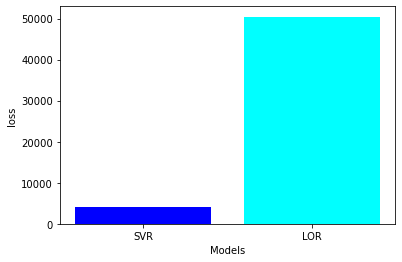

In [121]:
plt.bar(['SVR','LOR'],[loss1,loss4],color=['blue','cyan'])
plt.xlabel('Models')
plt.ylabel('loss')

Text(0.5, 1.0, 'company_C')

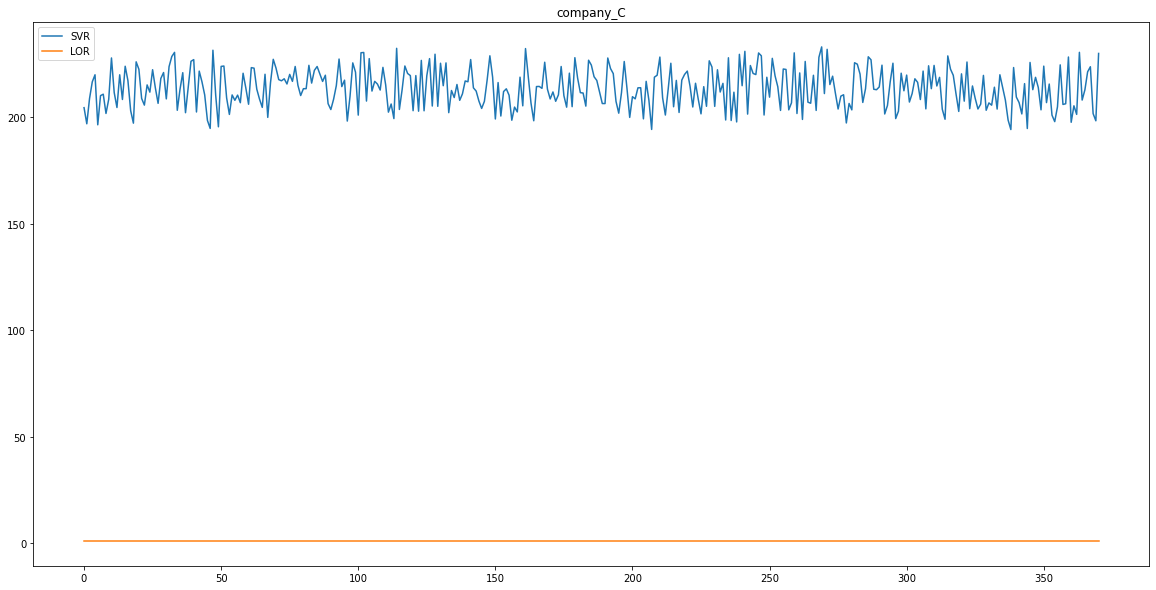

In [122]:
plt.figure(figsize=(20,10))
plt.plot(y_pred1)
plt.plot(y_pred4)
plt.legend(['SVR','LOR'])
plt.title('company_C')